In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting module
import seaborn as sns
import operator
import json
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from datetime import datetime
current_date = datetime(2023, 9, 16)

In [ ]:
df = pd.read_csv('/dataset/Dataset_-_CBRE_Challenge_-_HackSMU_2023.csv')
df.head()

,Asset ID,Asset Type,Floor,Room,Installation Date,Manufacturer,Operational Time (hrs),Work Orders,Repairs,Last Serviced Date
0,1,Elevator,7,103,1/6/2020,Manufacturer_4,39313,0,1,6/19/2023
1,2,Plumbing System,6,109,6/11/2022,Manufacturer_2,20012,0,1,1/6/2023
2,3,Fire Alarm,3,104,7/24/2019,Manufacturer_4,21546,10,5,9/24/2022
3,4,Elevator,1,105,1/4/2021,Manufacturer_4,47038,1,1,5/23/2023
4,5,Plumbing System,2,104,11/28/2022,Manufacturer_1,20022,10,3,1/29/2023


## Data Cleaning

In [ ]:
df.set_index('Asset ID', inplace=True)
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Asset Type,Floor,Room,Installation Date,Manufacturer,Operational Time (hrs),Work Orders,Repairs,Last Serviced Date
Asset ID,,,,,,,,,
1,Elevator,7,103,1/6/2020,Manufacturer_4,39313,0,1,6/19/2023
2,Plumbing System,6,109,6/11/2022,Manufacturer_2,20012,0,1,1/6/2023
3,Fire Alarm,3,104,7/24/2019,Manufacturer_4,21546,10,5,9/24/2022
4,Elevator,1,105,1/4/2021,Manufacturer_4,47038,1,1,5/23/2023
5,Plumbing System,2,104,11/28/2022,Manufacturer_1,20022,10,3,1/29/2023
6,Fire Alarm,2,103,7/29/2021,Manufacturer_3,1602,9,4,10/3/2022
7,Fire Alarm,6,108,8/23/2020,Manufacturer_2,15650,2,3,1/13/2023
8,HVAC,2,106,6/3/2021,Manufacturer_2,33932,1,4,8/9/2023
9,Fire Alarm,6,108,7/30/2023,Manufacturer_5,24332,5,4,2/13/2023


In [ ]:
df['Manufacturer'].value_counts()

Manufacturer_5    131
Manufacturer_3    100
Manufacturer_4     92
Manufacturer_2     90
Manufacturer_1     87
Name: Manufacturer, dtype: int64

In [ ]:
# Encoding Manufacturer into numeric type
df['Manufacturer_id'] = df['Manufacturer'].str.extract('(\d+)').astype(int)
df.head()

,Asset Type,Floor,Room,Installation Date,Manufacturer,Operational Time (hrs),Work Orders,Repairs,Last Serviced Date,Manufacturer_id
Asset ID,,,,,,,,,,
1,Elevator,7,103,1/6/2020,Manufacturer_4,39313,0,1,6/19/2023,4
2,Plumbing System,6,109,6/11/2022,Manufacturer_2,20012,0,1,1/6/2023,2
3,Fire Alarm,3,104,7/24/2019,Manufacturer_4,21546,10,5,9/24/2022,4
4,Elevator,1,105,1/4/2021,Manufacturer_4,47038,1,1,5/23/2023,4
5,Plumbing System,2,104,11/28/2022,Manufacturer_1,20022,10,3,1/29/2023,1


In [ ]:
df.shape

(500, 10)

### Feature Engineering

In [ ]:
# Calculate time since last service
df['Last Serviced Date'] = pd.to_datetime(df['Last Serviced Date'])
df['Time Since Last Service (days)'] = (current_date - df['Last Serviced Date']).dt.days

# Calculate asset age
df['Installation Date'] = pd.to_datetime(df['Installation Date'])
df['Asset Age (days)'] = (current_date - df['Installation Date']).dt.days

In [ ]:
# drop unnecessary features
df.drop(columns=['Manufacturer', 'Floor', 'Room', 'Installation Date', 'Last Serviced Date', 'Asset Type'], inplace=True)
df.head(20)

,Operational Time (hrs),Work Orders,Repairs,Manufacturer_id,Time Since Last Service (days),Asset Age (days)
Asset ID,,,,,,
1,39313,0,1,4,89,1349
2,20012,0,1,2,253,462
3,21546,10,5,4,357,1515
4,47038,1,1,4,116,985
5,20022,10,3,1,230,292
6,1602,9,4,3,348,779
7,15650,2,3,2,246,1119
8,33932,1,4,2,38,835
9,24332,5,4,5,215,48


In [ ]:
# drop the rows whose asset age is greater than last service date

df = df[df['Asset Age (days)'] >= df['Time Since Last Service (days)']]

In [ ]:
df.describe()

,Operational Time (hrs),Work Orders,Repairs,Manufacturer_id,Time Since Last Service (days),Asset Age (days)
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,26134.347126,4.868966,2.404598,3.181609,182.579310,1000.563218
std,14151.171313,3.262527,1.731246,1.443764,105.690859,461.734650
min,459.000000,0.000000,0.000000,1.000000,4.000000,66.000000
25%,14874.500000,2.000000,1.000000,2.000000,93.000000,625.000000
50%,26191.000000,5.000000,2.000000,3.000000,184.000000,991.000000
75%,38726.000000,8.000000,4.000000,5.000000,265.000000,1401.500000
max,49976.000000,10.000000,5.000000,5.000000,367.000000,1819.000000


In [ ]:
df = ((df - df.min ()) / (df.max() - df.min ())) * 9 + 1
df.head()

,Operational Time (hrs),Work Orders,Repairs,Manufacturer_id,Time Since Last Service (days),Asset Age (days)
Asset ID,,,,,,
1,8.061938,1.0,2.8,7.75,3.107438,7.586994
2,4.553870,1.0,2.8,3.25,7.173554,3.033086
3,4.832684,10.0,10.0,7.75,9.752066,8.439247
4,9.466002,1.9,2.8,7.75,3.776860,5.718197
5,4.555688,10.0,6.4,1.00,6.603306,2.160297


In [ ]:
# Splitting the dataset into Train (80%) and Test (20%)
df_train, df_test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=42)
df.head()

,Operational Time (hrs),Work Orders,Repairs,Manufacturer_id,Time Since Last Service (days),Asset Age (days)
Asset ID,,,,,,
1,8.061938,1.0,2.8,7.75,3.107438,7.586994
2,4.553870,1.0,2.8,3.25,7.173554,3.033086
3,4.832684,10.0,10.0,7.75,9.752066,8.439247
4,9.466002,1.9,2.8,7.75,3.776860,5.718197
5,4.555688,10.0,6.4,1.00,6.603306,2.160297


In [ ]:
# Unsupervised learning using K-means Algorithm
features = df_train[['Operational Time (hrs)', 'Work Orders', 'Repairs', 'Time Since Last Service (days)', 'Asset Age (days)']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Initialize the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=100)

# Fit the K-Means model to the scaled data
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataset
df_train['Cluster'] = kmeans.fit_predict(features)

df_train.head()

,Operational Time (hrs),Work Orders,Repairs,Manufacturer_id,Time Since Last Service (days),Asset Age (days),Cluster
Asset ID,,,,,,,
74,1.789547,9.1,2.8,7.75,1.297521,4.578437,3
324,2.472767,1.9,8.2,1.00,7.719008,7.607530,1
270,9.804249,2.8,2.8,10.00,1.223140,2.653166,0
35,5.603146,2.8,10.0,7.75,6.504132,9.969196,1
97,9.532342,8.2,1.0,10.00,3.057851,8.598403,3


In [ ]:
# Assuming df_train has the 'Cluster' feature
df_train['Maintenance Priority'] = df_train['Cluster'].map({0: 'Low', 1: 'Moderate', 2: 'Moderate', 3: 'High'})
df_train.head()

,Operational Time (hrs),Work Orders,Repairs,Manufacturer_id,Time Since Last Service (days),Asset Age (days),Cluster,Maintenance Priority
Asset ID,,,,,,,,
74,1.789547,9.1,2.8,7.75,1.297521,4.578437,3,High
324,2.472767,1.9,8.2,1.00,7.719008,7.607530,1,Moderate
270,9.804249,2.8,2.8,10.00,1.223140,2.653166,0,Low
35,5.603146,2.8,10.0,7.75,6.504132,9.969196,1,Moderate
97,9.532342,8.2,1.0,10.00,3.057851,8.598403,3,High


In [ ]:
df_train['Maintenance Priority'].value_counts()

Moderate    164
Low          98
High         86
Name: Maintenance Priority, dtype: int64

In [ ]:
# Visualize the clusters
trace1 = go.Scatter3d(
    x= df_train['Time Since Last Service (days)'],
    y= df_train['Repairs'],
    z= df_train['Work Orders'],
    mode='markers',
     marker=dict(
        color = df_train['Cluster'],
        size= 10,
        line=dict(
            color= df_train['Cluster'],
            width= 2
        ),
        opacity=1
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Time Since Last Service (days)'),
            yaxis = dict(title  = 'Repairs'),
            zaxis = dict(title  = 'Work Orders')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

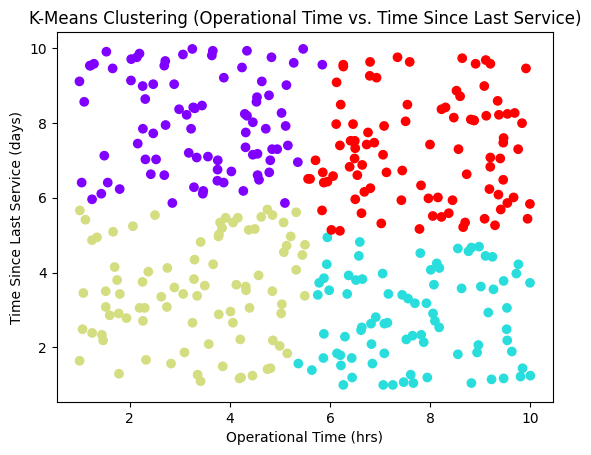

In [ ]:
# Visual for Operational Time (hrs) and Time Since Last Service (days)
features = df_train[['Operational Time (hrs)', 'Time Since Last Service (days)']]

# Perform K-Means clustering
df_train['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df_train['Cluster'], cmap='rainbow')
plt.xlabel('Operational Time (hrs)')
plt.ylabel('Time Since Last Service (days)')
plt.title('K-Means Clustering (Operational Time vs. Time Since Last Service)')
plt.show()


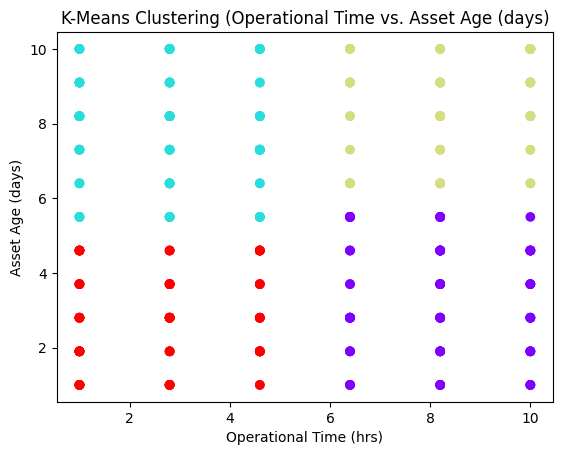

In [ ]:
# Visual for Operational Time and Asset Age
features = df_train[['Repairs', 'Work Orders']]

# Perform K-Means clustering
df_train['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df_train['Cluster'], cmap='rainbow')
plt.xlabel('Operational Time (hrs)')
plt.ylabel('Asset Age (days)')
plt.title('K-Means Clustering (Operational Time vs. Asset Age (days)')
plt.show()

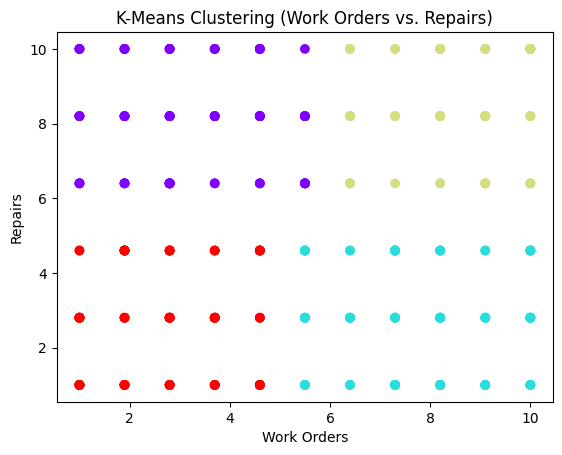

In [ ]:
# Visual for Work Orders and Repairs
features = df_train[['Work Orders', 'Repairs']]

# Perform K-Means clustering
df_train['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df_train['Cluster'], cmap='rainbow')
plt.xlabel('Work Orders')
plt.ylabel('Repairs')
plt.title('K-Means Clustering (Work Orders vs. Repairs)')
plt.show()

In [ ]:
import json

# Assuming you have df_train and its 'Maintenance Priority' column
maintenance_priority_counts = df_train['Maintenance Priority'].value_counts().to_dict()

# Save as a JSON file
with open('maintenance_priority_counts.json', 'w') as f:
    json.dump(maintenance_priority_counts, f)